In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
# load expression data and metadata into swan
annot = 'v29_cerberus.gtf'
ab = 'cerberus_filtered_abundance.tsv'
gene_ab = '/Users/fairliereese/mortazavi_lab/data/rnawg/lr_bulk/talon/human_talon_abundance.tsv'
gtf = 'cerberus.gtf'

In [3]:
sg = swan.SwanGraph()
sg.add_annotation(annot)
sg.add_transcriptome(gtf)
sg.save_graph('swan_transcriptome')


Adding annotation to the SwanGraph
> /Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py(752)parse_gtf()
    750                                 if tid == 'ENSG00000115255[2,4,3]':
    751                                         pdb.set_trace()
--> 752                                 if tid == 'ENSG00000115255[2,5,4]':
    753                                         pdb.set_trace()
    754 



ipdb>  c



Adding transcriptome to the SwanGraph
Saving graph as swan_transcriptome.p


In [3]:
sg = swan.read('swan_transcriptome.p')
sg.add_abundance(ab)

Read in graph from swan_transcriptome.p

Adding abundance for datasets hl60_m2_72hr_1_1, brodmann_area_46_1_1, pgp1_1_2, pc9_1_2, pgp1_astro_1_2... (and 133 more) to SwanGraph
Calculating TPM...
Calculating PI...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating edge usage...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Using cerberus IDs to calculate


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating TES usage...
Using cerberus IDs to calculate


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Calculating IC usage...
Using cerberus IDs to calculate


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


In [4]:
sg.save_graph('swan_transcriptome')

Saving graph as swan_transcriptome.p


In [5]:
sg = swan.read('swan_transcriptome.p')
sg.add_abundance(gene_ab, how='gene')

Read in graph from swan_transcriptome.p

Adding abundance for datasets gm12878_1_1, gm12878_1_2, gm12878_1_3, gm12878_1_4, gm12878_3_1... (and 133 more) to SwanGraph
Calculating TPM...


In [6]:
sg.save_graph('swan')

Saving graph as swan.p


In [7]:
sg.t_df.novelty.unique()

array(['Undefined', 'Known', 'NIC', 'NNC'], dtype=object)

In [8]:
temp = sg.t_df[['novelty', 'tid']]
temp.reset_index(drop=True, inplace=True)
temp[['novelty', 'tid']].groupby('novelty').count()

,tid
novelty,
Known,259638
NIC,47407
NNC,14203
Undefined,781


In [9]:
sg.save_graph('swan')

Saving graph as swan.p


## Add metadata

In [10]:
sg = swan.read('swan.p')
meta = '../swan/swan_metadata.tsv'
sg.add_metadata(meta)

# colors
c_dict, order = get_biosample_colors()
sg.set_metadata_colors('sample', c_dict)

c_dict, order = get_ad_colors()
sg.set_metadata_colors('health_status', c_dict)

sg.save_graph('swan')

Read in graph from swan.p
Saving graph as swan.p


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [12]:
sg.tes_adata.var.head()

,gid,gname,vertex,tes_name
tes_id,,,,
ENCODEHG000058784_1,ENCODEHG000058784,ENCODEHG000058784,22,ENCODEHG000058784_1
ENCODEHG000058784_2,ENCODEHG000058784,ENCODEHG000058784,34,ENCODEHG000058784_2
ENCODEHG000058837_1,ENCODEHG000058837,ENCODEHG000058837,0,ENCODEHG000058837_1
ENCODEHG000058844_1,ENCODEHG000058844,ENCODEHG000058844,58,ENCODEHG000058844_1
ENCODEHG000058844_2,ENCODEHG000058844,ENCODEHG000058844,59,ENCODEHG000058844_2


## Get ic, tss, tes info from cerberus

In [470]:
# sg.t_df.head()

In [519]:
def make_cerberus_adatas(sg, mode):
    """
    Parameters:
        mode (str): {'ic', 'tss', 'tes'}
    """
    id_col = '{}_id'.format(mode)
    name_col = '{}_name'.format(mode)
    
    # merge ic, tss, tes info with transcript counts
    gb_cols = ['gid', 'gname', id_col]
    subset_cols = copy.deepcopy(gb_cols)
    if mode in ['tss', 'tes']:
        end = True
        vert_col = '{}_vertex'.format(mode)
        subset_cols.append('loc_path')
        if mode == 'tss':
            ind = 0
        elif mode == 'tes':
            ind = -1
    else:
        end = False
    
    df = sg.t_df[subset_cols].reset_index()
    
    # merge with vertex id
    if end:
        df[vert_col] = [path[ind] for path in df.loc_path.values.tolist()]
        df.drop('loc_path', axis=1, inplace=True)
        gb_cols.append(vert_col)
     
    t_counts = sg.get_transcript_abundance(kind='counts')
    t_counts = t_counts.merge(df, how='left', on='tid')
    # if mode == 'tes':
    #     print(t_counts.loc[t_counts.tes_id == 'ENCODEHG000058837_1', 'hl60_m2_72hr_1_1'])
    
    # gb and sum counts over the different features
    t_counts.drop('tid', axis=1, inplace=True)
    # print(mode)
    # print(gb_cols)
    t_counts = t_counts.groupby(gb_cols).sum()
    
    # get separate components of the table
    X = sparse.csr_matrix(t_counts.transpose().values)
    obs = sg.adata.obs
    
    # add name of thing
    t_counts.reset_index(inplace=True)
    t_counts[name_col] = t_counts.gname+'_'+t_counts[id_col].str.split('_', expand=True)[1]    
    gb_cols.append(name_col)
    var = t_counts[gb_cols]
    
    return obs, var, X

In [525]:
tss_ad = anndata.AnnData(var=var, obs=obs, X=X)

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [521]:
X.shape

(138, 86085)

In [522]:
obs.shape

(138, 5)

In [523]:
var.shape

(86085, 5)

In [526]:
sg.tss_adata.var.head()

,gid,gname,vertex_id,tss_name
tss_id,,,,
ENCODEHG000058784_1,ENCODEHG000058784,ENCODEHG000058784,43,ENCODEHG000058784_1
ENCODEHG000058784_2,ENCODEHG000058784,ENCODEHG000058784,45,ENCODEHG000058784_2
ENCODEHG000058837_1,ENCODEHG000058837,ENCODEHG000058837,11,ENCODEHG000058837_1
ENCODEHG000058837_2,ENCODEHG000058837,ENCODEHG000058837,17,ENCODEHG000058837_2
ENCODEHG000058844_1,ENCODEHG000058844,ENCODEHG000058844,46,ENCODEHG000058844_1


## Get triplets functions for cerberus annotation

In [416]:
# compute triplets from cerberus reference
h5 = 'cerberus_annot.h5'
# ic, tss, tes, tss_map, tes_map, df = read_h5(h5)

In [417]:
def flatten(list_of_lists):
    if len(list_of_lists) == 0:
        return list_of_lists
    if isinstance(list_of_lists[0], list):
        return flatten(list_of_lists[0]) + flatten(list_of_lists[1:])
    return list_of_lists[:1] + flatten(list_of_lists[1:])

In [418]:
class CerberusAnnotation():
    def __init__(self):
        self.tss = None
        self.tes = None
        self.ic = None
        
        self.tss_map = None
        self.tes_map = None
        self.t_map = None
        
        self.tss_sources = []
        self.tes_sources = []
        self.ic_sources = []
        self.all_sources = []
        
        self.triplets = None
        
    def get_sources(self, df):
        s = [s.split(',') for s in df.source.unique().tolist()]
        s = list(set(flatten(s)))
        return s
    
    def get_all_sources(self):
        """
        Get sources that are present in tss, ic, and tes 
        """
        all_s = list(set(self.tss_sources)&\
                     set(self.tes_sources)&\
                     set(self.ic_sources))
        return all_s
        
    def set_tss(self, tss):
        self.tss = tss
        self.tss_sources = self.get_sources(self.tss)
        self.all_sources = self.get_all_sources()
    
    def set_tes(self, tes):
        self.tes = tes
        self.tes_sources = self.get_sources(self.tes)
        self.all_sources = self.get_all_sources()
        
    def set_ic(self, ic):
        self.ic = ic
        self.ic_sources = self.get_sources(self.ic)
        self.all_sources = self.get_all_sources()
    
        
#     def subset_on_source(self, source):
#         self.tss = self.tss.loc[self.tss.source.str.contains(source)].copy(deep=True)
#         self.tes = self.tes.loc[self.tes.source.str.contains(source)].copy(deep=True)
#         self.ic = self.ic.loc[self.ic.source.str.contains(source)].copy(deep=True)
        
#         return self
    def set_sg(self, sg):
        self.sg = sg
        

In [426]:
def read(h5):
    c_annot = CerberusAnnotation()
    ic, tss, tes, tss_map, tes_map, m = read_h5(h5, as_pyranges=False)
    c_annot.set_tss(tss)
    c_annot.set_tes(tes)
    c_annot.set_ic(ic)
    c_annot.tss_map = tss_map
    c_annot.tes_map = tes_map
    c_annot.t_map = m
    
    return c_annot

In [427]:
c_annot = read(h5
               

In [428]:
temp = c_annot.t_map[['transcript_id_y', 'tss_first_sd_issue']].copy(deep=True)
print(temp.groupby('tss_first_sd_issue').count())

temp = c_annot.t_map[['transcript_id_y', 'tes_last_sa_issue']].copy(deep=True)
print(temp.groupby('tes_last_sa_issue').count())





                    transcript_id_y
tss_first_sd_issue                 
False                        293214
True                             13
                   transcript_id_y
tes_last_sa_issue                 
False                       293227


In [429]:
((13) / len(c_annot.t_map.index))*100


0.004433425298488884

In [334]:
def count_instances(df, mode):
    count_col = 'n_{}'.format(mode)
    df = df[['gene_id', 'Name']].groupby('gene_id').count().reset_index()
    df = df.rename({'Name': count_col}, axis=1)
    df[count_col] = df[count_col].astype(int)
    return df

def compute_splicing_ratio(df):
    df['splicing_ratio'] = df.n_ic/((df.n_tes+df.n_tss)/2)
    return df

In [376]:
def get_cerberus_triplets(c_annot):
    
    sources = c_annot.all_sources + ['all']
    trip_df = pd.DataFrame()
    for source in sources:
        
        if source != 'all':

            # make sure that source is in each df
            if source not in c_annot.all_sources:
                raise ValueError('Source {} not in cerberus annotation'.format(source))

            tss = c_annot.tss.loc[c_annot.tss.source.str.contains(source)].copy(deep=True)
            tes = c_annot.tes.loc[c_annot.tes.source.str.contains(source)].copy(deep=True)
            ic = c_annot.ic.loc[c_annot.ic.source.str.contains(source)].copy(deep=True)

        else:
            tss = c_annot.tss.copy(deep=True)
            tes = c_annot.tes.copy(deep=True)
            ic = c_annot.ic.copy(deep=True)

        # compute total # of unique ends / ics for each df
        tss = count_instances(tss, 'tss')
        tes = count_instances(tes, 'tes')
        ic = count_instances(ic, 'ic')

        df = tss
        print(len(df.index))
        # print(df.head())
        df = df.merge(tes, on='gene_id', how='outer')
        # print(df.head())
        print(len(df.index))
        df = df.merge(ic, on='gene_id', how='outer')
        print(len(df.index))
        df['source'] = source
        # t = list(set(tes.gene_id.tolist())-set(tss.gene_id.tolist()))
        # t = list(set(ic.gene_id.tolist() )- set(tss.gene_id.tolist()))
        # t[:10]
        # df.head()
        trip_df = pd.concat([trip_df, df])

    # add splicing ratio
    trip_df = compute_splicing_ratio(trip_df)
    
    # rename gid col
    trip_df.rename({'gene_id': 'gid'}, axis=1, inplace=True)
    
    # add the gene id
    temp = sg.t_df[['gid', 'gname']].copy(deep=True)
    temp.rename({'gid':'gene_id'}, axis=1, inplace=True)
    temp = add_stable_gid(temp)
    temp.reset_index(drop=True)
    temp.drop_duplicates(inplace=True)
    temp.rename({'gene_id': 'gid'}, axis=1, inplace=True)
    trip_df = trip_df.merge(temp, how='left', on='gid')

    return trip_df

In [377]:
source_trip = get_cerberus_triplets(c_annot)


58277
58648
58905
60399
61212
61544
35636
36019
36020
62259
62259
62384


In [378]:
source_trip.head()


,gid,n_tss,n_tes,n_ic,source,splicing_ratio,gname
0,ENSG00000000003,3.0,5.0,5.0,v29,1.250000,TSPAN6
1,ENSG00000000005,2.0,2.0,2.0,v29,1.000000,TNMD
2,ENSG00000000419,2.0,2.0,6.0,v29,3.000000,DPM1
3,ENSG00000000457,3.0,4.0,5.0,v29,1.428571,SCYL3
4,ENSG00000000460,5.0,5.0,9.0,v29,1.800000,C1orf112


In [412]:
def plot_dorito(counts,
                top='splicing_ratio',
                subset=None,
                gene=None,
                hue=None,
                cmap='magma',
                mmap=None,
                density=False,
                density_scale=1,
                density_cmap='viridis',
                density_vmax=None,
                sectors=False,
                sect_alpha=0.5,
                sect_beta=0.5,
                sect_gamma=0.5,
                log_density=False,
                scatter=True,
                size=None,
                legend=True,
                log_size=False,
                jitter=False,
                alpha=1,
                scale=True,
                title=None,
                opref='figures/'):
    """
    Plot a dorito from counts with the given subset in a given 
    color
    
    Parameters:
        counts (pandas DataFrame): DF of the counts per gene 
            of ic, tss, tes from get_ic_tss_tes or
            compute_triplets (or both!!!)
        top (str): Column name to plot as apex of dorito.
            Choose from 'ic' or 'splicing_ratio'
        subset (dict of lists): List mapping counts column names
            to values in said columns to include in the data
        hue (str): Column from counts to color by
        cmap (str or dict of str): Either a dictionary mapping
            categorical column values from hue or a valid 
            matplotlib continuous named color palette
        mmap (str or dict of str): Dictionary mapping categorical
            column values from hue to marker styles
        scale (bool): Whether to scale values b/w 1 and 0. 
        alpha (float): Alpha value of points
        title (str): Title to give plot
        opref (str): Output file prefix to save fig
    """
    
    #### subset dataset and transform numbers as needed ####
    temp = counts.copy(deep=True)

    # if we have a gene name, limit to those entries
    if gene:

        temp = temp.loc[temp.gname == gene]
        if temp.empty:
            temp = temp.loc[temp.gid == gene]
            gene = temp.gname.values[0]

    # if we have a list of allowed sources, limit to those entries
    if subset:
        for col, val in subset.items():
            if type(val) != list:
                val = [val]
            temp = temp.loc[temp[col].isin(val)]
            
    # scale and assign which columns to use 
    c = dict()
    if scale:
        if top == 'splicing_ratio':
            temp['total'] = temp.n_tss+temp.n_tes+temp.splicing_ratio
        elif top == 'n_ic':
            temp['total'] = temp.n_tss+temp.n_tes+temp.n_ic
        temp['tss_ratio'] = temp.n_tss/temp.total
        temp['tes_ratio'] = temp.n_tes/temp.total
        temp['top_ratio'] = temp[top]/temp.total

        c['a'] = 'tss_ratio'
        c['b'] = 'top_ratio'
        c['c'] = 'tes_ratio'
    else:
        c['a'] = 'n_tss'
        c['b'] = top
        c['c'] = 'n_tes'
    
    if scale == True:
        scale = 1
        mult = 0.2
    else: 
        scale = max_pts(temp, c)
        
    # density
    if density:
        if hue:
            if counts[hue].dtype.name == 'object':
                pad = 0.1
            else:
                pad = 0.0
        else:
            pad = 0.1
        figure, tax, temp = density_dorito(temp, c, 
                                 density_scale, 
                                 density_cmap, 
                                 density_vmax,
                                 log_density,
                                 pad=pad)
        scale = density_scale
        figure.set_size_inches(13,10)
        
    # if we're jittering, adjust the points for each thing
    if jitter:
        temp, c = jitter_dorito(temp, c, density_scale) 

    # figure layout parameters
    fontsize = 18
    offset = 0.1
    mult = scale/5

    # if we don't already have a fig and axis from density,
    # make one
    if not density:
        figure, tax = ternary.figure(scale=scale, permutation='210')
        figure.set_facecolor('white')

    # plot gridlines below the scatterplot
    tax.gridlines(linewidth=3, multiple=mult,
                  color='white', zorder=1, linestyle=None)
    
    # scatter
    if scatter:

        figure, tax = scatter_dorito(temp, c, hue,
                                    size, log_size,
                                    cmap, mmap, alpha,
                                    density, legend,
                                    figure, tax)
        
    # sectors
    if sectors:
        line_dorito(sect_alpha, sect_beta, sect_gamma, 
                    scale, tax, figure)

    # title handler
    if not title:
        if gene:
            title = '$\it{}$\n'.format(gene)
        else:
            title = ''
    else:
        if gene:
            title = '{} $\it{}$\n'.format(title, gene)
        else:
            title = '{}\n'.format(title)

    tax.set_title(title, fontsize=20)
    tax.boundary(linewidth=2, c='#e5ecf6')
    labels = ['{:.1f}'.format(n) for n in np.arange(0, 1.2, .2)]
    tax.ticks(ticks=labels,
              axis='lbr', linewidth=1, multiple=mult,
              tick_formats="%.1f", offset=0.014,
              fontsize=14)
    # tax.ticks(axis='lbr', linewidth=1, multiple=mult,
    #           tick_formats="%.1f", offset=0.014,
    #           fontsize=14)
    
    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')
    tax.set_background_color('#e5ecf6')

    if top == 'splicing_ratio':
        top_label = 'Splicing ratio $\\beta$'
    elif top == 'intron_chain':
        top_label = 'Intron chains $\\delta$'
    # tax.left_corner_label('# TSSs $\\alpha$', fontsize=fontsize)
    # tax.top_corner_label(top_label, fontsize=fontsize)
    # tax.right_corner_label('# TESs $\\gamma$', fontsize=fontsize)
    tax.left_axis_label('TSS $\\alpha$', fontsize=fontsize, offset=0.12)
    tax.right_axis_label(top_label, fontsize=fontsize, offset=0.12)
    tax.bottom_axis_label('TES $\\gamma$', fontsize=fontsize, offset=0.00)
    
    figure.set_facecolor('white')
        
    # tax.show()
    
    # save figure
    fname = opref
    if gene:
        fname += '_{}'.format(gene)
    if density:
        fname += '_density'
    if scatter:
        fname += '_scatter'
    if hue:
        fname += '_{}'.format(hue)
    fname += '.png'
    plt.savefig(fname, dpi=300, bbox_inches='tight')               
    
    return temp

def scatter_dorito(counts,
                   c, 
                   hue,
                   size,
                   log_size,
                   cmap, 
                   mmap,
                   alpha,
                   density,
                   legend,
                   figure, 
                   tax):
    """
    Parameters 
        counts (pandas DataFrame): subset the thing
        c (dict of str): Dictionary of column names to plot as a, b, c 
            indexed by 'a', 'b', 'c'
    """
    
    def scale_col(points, counts, col, log=False, how='color'):
            if log:
                log_col = '{}_log'.format(col)
                counts[log_col] = np.log10(counts[col])
                col = log_col
            vals = counts[[col]]
            max_val = vals[col].max()
            min_val = vals[col].min()
            min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 300))
            vals = min_max_scaler.fit_transform(vals)
            max_scaled = max(vals)
            min_scaled = min(vals)
            
            # replace nans w/ 100
            vals = [100 if np.isnan(v) else v for v in vals]
            
            return vals, min_val, max_val, min_scaled, max_scaled
        
    # defaults
    points = [(x[0], x[1], x[2]) for x in zip_pts(counts, c)]
    labels = ['' for i in range(len(points))]
    hue_type = None
    figsize = (10,10)
    colors = '#e78424'
    if len(points) < 60:
        sizes = [100 for i in range(len(points))]
    else:
        sizes =  [20 for i in range(len(points))]
    markers = 'o'
    vmin = 0
    vmax = 1
    plotted = False
        
    # get color
    if hue:
            
        # categorical
        if counts[hue].dtype.name == 'object':
            hue_type = 'cat'
            colors = counts[hue].map(cmap).tolist()
            labels = counts[hue].tolist()

        # continuous
        else:
            hue_type = 'cont'
            colors, abs_min, abs_max, vmin, vmax = scale_col(points, counts, hue)
    
    # get sizes
    if size:
        sizes,_,_,_,_ = scale_col(points, counts, size, log_size)
        print(sizes[:5])
        
    # marker style
    if mmap:
        markers = [mmap[val] if val in mmap.keys() else 'o' for val in counts[hue].unique()]
    elif hue_type == 'cat':
        markers = ['o' for val in counts[hue].unique()]
        
    # figure size handling
    if hue_type == 'cat' and density: figsize = (13,10)
    elif hue_type == 'cat' and not density: figsize = (10,10)
    elif hue_type == 'cont' and density: figsize = (16,10)
    elif hue_type == 'cont' and not density: figsize = (13,10)
    elif density: figsize = (13,10)
    figure.set_size_inches(figsize[0], figsize[1])
    
    # actual scatter call
    if hue_type == 'cat':
        pdb.set_trace()
        for point, color, size, label, marker in zip(points, colors, sizes, labels, markers):
            tax.scatter([point], vmin=vmin, vmax=vmax,
                    s=size, c=color, cmap=cmap,
                    marker=marker,label=label,
                    alpha=alpha, zorder=3)
    else:   
        tax.scatter(points, vmin=vmin, vmax=vmax,
                    s=sizes, c=colors, cmap=cmap, marker=markers,
                    alpha=alpha, zorder=3)
    
    # legend handling
    if hue_type == 'cat' and legend:
        if density: x = 1.6
        else: x = 1.4
        tax.legend(bbox_to_anchor=(x, 1.05),
                   loc='upper right', prop={'size': 14})
        
        # fix marker size
        ax = tax.get_axes()
        lgnd = ax.get_legend()
        for handle in lgnd.legendHandles:
            handle._sizes = [100]
    
    # colorbar handling
    if hue_type == 'cont':
        ax = tax.get_axes()
        norm = plt.Normalize(vmin=abs_min, vmax=abs_max)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm._A = []
        cb = plt.colorbar(sm, ax=ax, pad=0.1)
        for t in cb.ax.get_yticklabels():
             t.set_fontsize(16)
        if hue == 'tss' or hue == 'tes':
            cb.set_label('# {}s'.format(hue.upper()), size=16)
        elif hue == 'intron_chain':
            cb.set_label('# {}s'.format(hue), size=16)
        
    return figure, tax  

[array([39.56343], dtype=float32), array([124.625114], dtype=float32), array([100.872086], dtype=float32), array([40.48828], dtype=float32), array([26.089893], dtype=float32)]
> <ipython-input-412-9df8a5236e8f>(289)scatter_dorito()
    287     if hue_type == 'cat':
    288         pdb.set_trace()
--> 289         for point, color, size, label, marker in zip(points, colors, sizes, labels, markers):
    290             tax.scatter([point], vmin=vmin, vmax=vmax,
    291                     s=size, c=color, cmap=cmap,



ipdb>  c


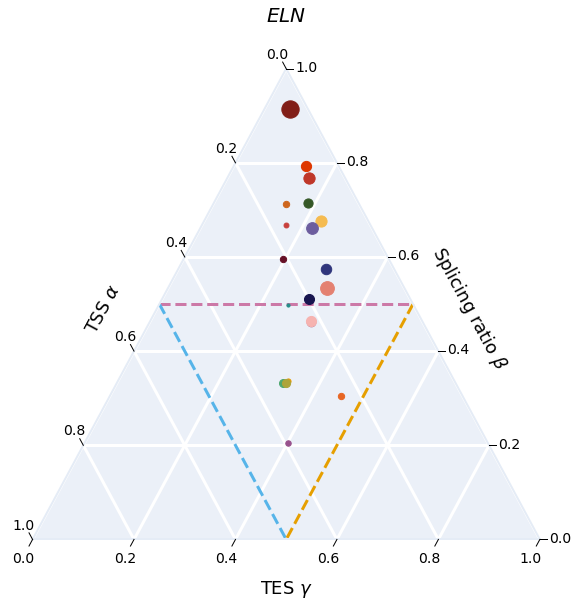

In [415]:
# ELN
c_dict, order = get_biosample_colors()
_ = plot_dorito(trip_df,
            top='splicing_ratio', 
            gene='ELN',
            hue='sample',
            size='gene_tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            legend=False,
            jitter=True)

In [414]:
temp

,gid,sample,tid,n_tss,n_ic,n_tes,gene_tpm,splicing_ratio,gname,total,tss_ratio,tes_ratio,top_ratio,a_jitter,b_jitter,c_jitter
12784,ENSG00000049540,imr90,3,1,3,1,4.305609,3.000000,ELN,5.000000,0.200000,0.200000,0.600000,0.201696,0.606401,0.202578
24163,ENSG00000049540,adipose,22,1,17,3,59.061775,8.500000,ELN,12.500000,0.080000,0.240000,0.680000,0.082181,0.676586,0.242868
35821,ENSG00000049540,ovary,18,2,13,3,28.426884,5.200000,ELN,10.200000,0.196078,0.294118,0.509804,0.199353,0.506998,0.294534
59656,ENSG00000049540,wtc11,5,1,5,1,4.429960,5.000000,ELN,7.000000,0.142857,0.142857,0.714286,0.134245,0.713073,0.139418
99130,ENSG00000049540,adrenal gland,1,1,1,1,2.843765,1.000000,ELN,3.000000,0.333333,0.333333,0.333333,0.333926,0.336243,0.331336
154933,ENSG00000049540,heart,82,2,58,4,63.317043,19.333333,ELN,25.333333,0.078947,0.157895,0.763158,0.076307,0.769793,0.161141
172245,ENSG00000049540,h9_chondro,271,2,134,3,13063.607422,53.600000,ELN,58.600000,0.034130,0.051195,0.914676,0.026020,0.906055,0.058185
195565,ENSG00000049540,h1_de,4,1,4,1,2.661978,4.000000,ELN,6.000000,0.166667,0.166667,0.666667,0.171180,0.666497,0.159926
210413,ENSG00000049540,colon,15,1,11,2,17.216822,7.333333,ELN,10.333333,0.096774,0.193548,0.709677,0.093158,0.705047,0.195374
225352,ENSG00000049540,a673,21,1,17,2,31.607166,11.333333,ELN,14.333333,0.069767,0.139535,0.790698,0.062063,0.791717,0.130715


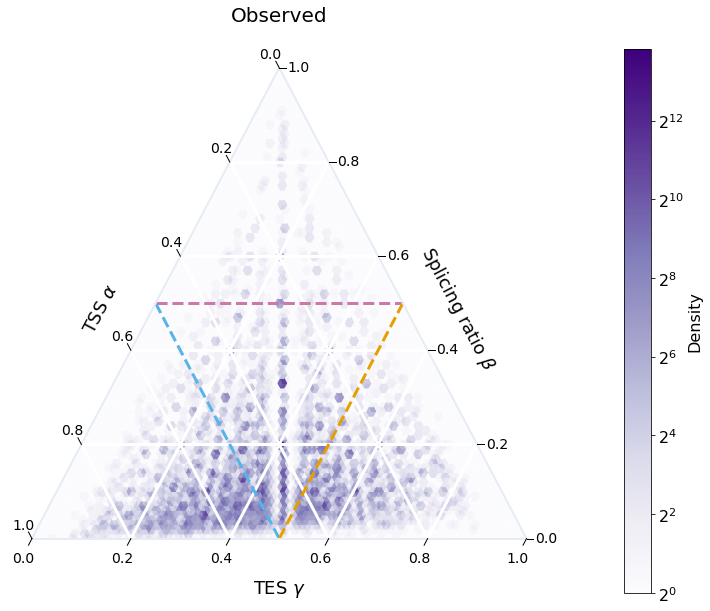

In [350]:
temp = plot_dorito(source_trip,
            top='splicing_ratio',
            subset={'source': 'lapa'},
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            scatter=False,
            title='Observed')


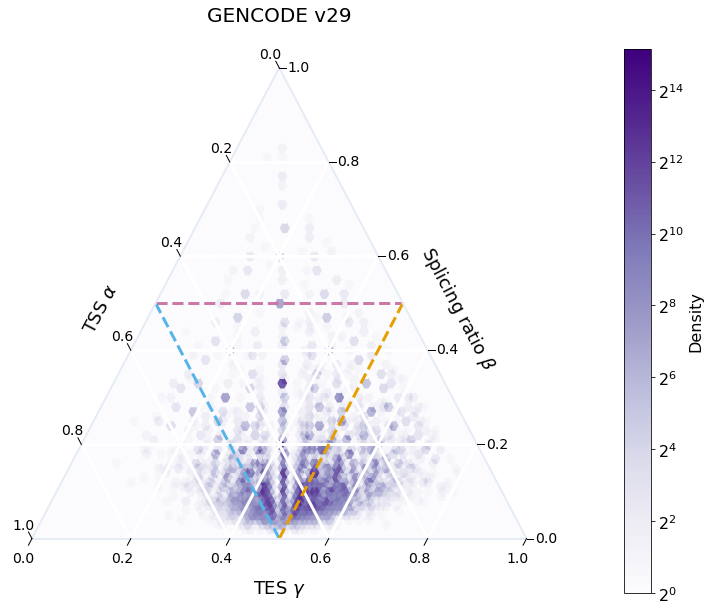

In [353]:
temp = plot_dorito(source_trip,
            top='splicing_ratio',
            subset={'source': 'v29'},
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            scatter=False,
            title='GENCODE v29')

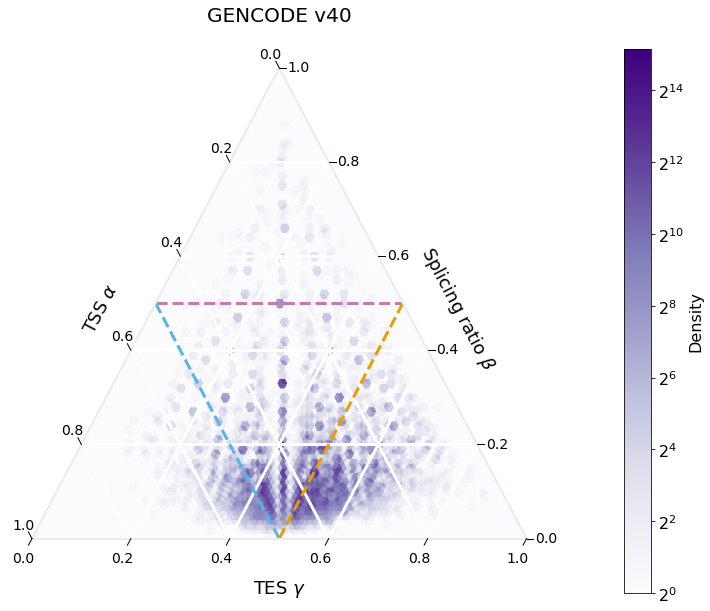

In [354]:
temp = plot_dorito(source_trip,
            top='splicing_ratio',
            subset={'source': 'v40'},
            density=True,
            density_scale=100,
            density_cmap='Purples',
            log_density=True,
            sectors=True,
            scatter=False,
            title='GENCODE v40')

In [395]:
trip_df.loc[trip_df.gname == 'ELN']

,gid,sample,tid,n_tss,n_ic,n_tes,gene_tpm,splicing_ratio,gname
12784,ENSG00000049540,imr90,3,1,3,1,4.305609,3.000000,ELN
24163,ENSG00000049540,adipose,22,1,17,3,59.061775,8.500000,ELN
35821,ENSG00000049540,ovary,18,2,13,3,28.426884,5.200000,ELN
59656,ENSG00000049540,wtc11,5,1,5,1,4.429960,5.000000,ELN
99130,ENSG00000049540,adrenal gland,1,1,1,1,2.843765,1.000000,ELN
154933,ENSG00000049540,heart,82,2,58,4,63.317043,19.333333,ELN
172245,ENSG00000049540,h9_chondro,271,2,134,3,13063.607422,53.600000,ELN
195565,ENSG00000049540,h1_de,4,1,4,1,2.661978,4.000000,ELN
210413,ENSG00000049540,colon,15,1,11,2,17.216822,7.333333,ELN
225352,ENSG00000049540,a673,21,1,17,2,31.607166,11.333333,ELN


In [197]:
sg = swan.read('swan.p') # this is the version that has the metadata

Read in graph from swan.p


In [388]:
def get_expressed_triplets(c_annot, sg, obs_col, min_tpm):
    
    # get sample, transcript level TPM values and format
    t_df = swan.calc_tpm(sg.adata, obs_col='dataset')
    t_df = t_df.sparse.to_dense()
    t_df = t_df.merge(sg.adata.obs[gb], how='left', left_index=True, right_index=True)
    t_df.reset_index(drop=True, inplace=True)
    t_df.set_index(gb)
    t_df = t_df.groupby(gb, observed=True).max()
    t_df = t_df.T

    # get transcript detection table and format
    t_df = (t_df >= min_tpm)
    
    # some formatting
    cols = ['tss_id', 'ic_id', 'tes_id', 'gid']
    dataset_cols = t_df.columns.tolist()
    t_df = t_df.merge(sg.t_df[cols], how='left', left_index=True, right_index=True)
    t_df.rename({'gid': 'gene_id'}, axis=1, inplace=True)
    t_df = add_stable_gid(t_df)
    t_df.reset_index(inplace=True)
    t_df.rename({'index': 'tid'}, axis=1, inplace=True)
    
    # count the unique tss, ic, tes, and isoforms from each expressed
    # isoform in each sample
    trip_df = pd.DataFrame()
    for c in dataset_cols:
        keep_cols = ['tid', 'tss_id', 'ic_id', 'tes_id', 'gene_id']
        temp = t_df.loc[t_df[c]].copy(deep=True)
        temp = temp[keep_cols]
        temp = temp.groupby('gene_id').nunique()
        temp.rename({'tss_id': 'n_tss', 
                     'ic_id': 'n_ic', 
                     'tes_id': 'n_tes'}, axis=1, inplace=True)
        temp[gb] = c
        temp.set_index(gb, inplace=True, append=True)
        trip_df = pd.concat([trip_df, temp])
        
    # add gene tpm and format
    g_df = swan.calc_tpm(sg.gene_adata, obs_col=gb)
    g_df = g_df.sparse.to_dense()
    g_df = g_df.T
    g_df.reset_index(inplace=True)
    g_df.rename({'index': 'gene_id'}, axis=1, inplace=True)
    g_df = add_stable_gid(g_df)
    g_df.set_index('gene_id', inplace=True)
    g_df = g_df.melt(var_name=gb, value_name='gene_tpm', ignore_index=False)
    g_df.set_index(gb, inplace=True, append=True)
    
    trip_df = trip_df.merge(g_df, how='left', left_index=True, right_index=True)    
    trip_df = compute_splicing_ratio(trip_df)   
    
    trip_df.reset_index(inplace=True)
    
    # add the gene id
    temp = sg.t_df[['gid', 'gname']].copy(deep=True)
    trip_df.rename({'gene_id': 'gid'}, axis=1, inplace=True)
    temp.rename({'gid':'gene_id'}, axis=1, inplace=True)
    temp = add_stable_gid(temp)
    temp.reset_index(drop=True)
    temp.drop_duplicates(inplace=True)
    temp.rename({'gene_id': 'gid'}, axis=1, inplace=True)
    trip_df = trip_df.merge(temp, how='left', on='gid')
    
    return trip_df

In [389]:
trip_df = get_expressed_triplets(c_annot, sg, obs_col='sample', min_tpm=1)

In [390]:
trip_df.head()

,gid,sample,tid,n_tss,n_ic,n_tes,gene_tpm,splicing_ratio,gname
0,ENSG00000000003,hepg2,6,1,3,4,191.014984,1.2,TSPAN6
1,ENSG00000000419,hepg2,6,1,6,2,62.502338,4.0,DPM1
2,ENSG00000000457,hepg2,1,1,1,1,3.207075,1.0,SCYL3
3,ENSG00000000460,hepg2,3,2,3,2,8.606131,1.5,C1orf112
4,ENSG00000001036,hepg2,7,1,5,4,282.548126,2.0,FUCA2


In [206]:
# calculate pi values to get weighted triplet
t_df, _ = swan.calc_pi(sg.adata, sg.t_df, obs_col=gb) # this boi is sparse

In [210]:
# add additional stuff to end adatas
sg.tss_adata.var['gene_id'] = sg.tss_adata.var['gid']
sg.tss_adata.var = add_stable_gid(sg.tss_adata.var)
sg.tss_adata.var = sg.tss_adata.var.merge(sg.loc_df[['chrom', 'coord']],
                                          how='left', left_on='vertex_id', 
                                          right_index=True)

In [326]:
def check_gene_sample(sample, gene):
    n_tss = len(t_df.loc[(t_df[sample])&(t_df.gene_id == gene), 'tss_id'].unique())
    n_ic = len(t_df.loc[(t_df[sample])&(t_df.gene_id == gene), 'ic_id'].unique())
    n_tes = len(t_df.loc[(t_df[sample])&(t_df.gene_id == gene), 'tes_id'].unique())
    n_t = len(t_df.loc[(t_df[sample])&(t_df.gene_id == gene)].index.unique())
    
    print('Triplet for {}, {}: [{},{},{}]'.format(sample, gene, n_tss, n_ic, n_tes))
    print('n transcripts: {}'.format(n_t))


In [328]:
# check_gene_sample('hepg2', 'ENSG00000000003')

In [110]:
tss_map = c_annot.tss_map
tss_map = tss_map.loc[~tss_map.Name.isnull()]
tss_map['gene_id'] = tss_map.Name.str.split('_', expand=True)[0]
tss_map.loc[(tss_map.gene_id.isin(t))&(tss_map.source == 'v29')]

,Chromosome,Start,End,Strand,source,Name,gene_id
13224,chr1,11908096,11908197,+,v29,ENSG00000285646_2,ENSG00000285646
13225,chr1,11908101,11908202,+,v29,ENSG00000199347_1,ENSG00000199347
13249,chr1,12166892,12166993,+,v29,ENSG00000283789_1,ENSG00000283789
13510,chr1,16643058,16643159,-,v29,ENSG00000283773_1,ENSG00000283773
14056,chr1,25337414,25337515,-,v29,ENSG00000259984_1,ENSG00000259984
...,...,...,...,...,...,...,...
2484818,chrX,102599461,102599590,+,v29,ENSG00000271147_3,ENSG00000271147
2484821,chrX,147911771,147911872,+,v29,ENSG00000274086_2,ENSG00000274086
2484822,chrX,73944281,73944382,+,v29,ENSG00000274430_2,ENSG00000274430
2484823,chrX,155382064,155382165,+,v29,ENSG00000274791_1,ENSG00000274791


In [104]:
tes.loc[tes.gene_id == 'ENSG00000277577']

,gene_id,n_tes
54299,ENSG00000277577,1


In [88]:
tss.head()

,gene_id,n_tss
0,ENSG00000000003,3
1,ENSG00000000005,2
2,ENSG00000000419,2
3,ENSG00000000457,3
4,ENSG00000000460,5


In [83]:
tss = tss[['Name', 'gene_id']].groupby('gene_id').count().reset_index()
tss.rename({'Name

In [84]:
tss.head()

,Name
gene_id,
ENSG00000000003,3
ENSG00000000005,2
ENSG00000000419,2
ENSG00000000457,3
ENSG00000000460,5


## Merge cerberus end ids with preexisting ones

In [297]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [311]:
def annotate_cerberus_ends(sg, c_annot, mode):
    """
    Annotate each end in Swan with the cerberus end that it comes from
    """
    if mode == 'tss':
        path_ind = 0
        adata = sg.tss_adata
    elif mode == 'tes':
        path_ind = -1
        adata = sg.tes_adata
    id_col = '{}_id'.format(mode)
    
    ends = [path[path_ind] for path in sg.t_df.loc_path.values.tolist()]
    temp = sg.t_df[[id_col]]
    temp['vertex_id'] = ends
    temp.reset_index(drop=True, inplace=True)
    temp.drop_duplicates(inplace=True)
    
    temp.rename({id_col: 'cerberus_id'}, axis=1, inplace=True)
    # adata.var = adata.var.merge(temp, how='left', on='vertex_id')
    
    return temp

In [312]:
temp = annotate_cerberus_ends(sg, c_annot, mode='tss')

In [318]:
temp.loc[temp.vertex_id.duplicated(keep=False)].sort_values(by='vertex_id')

,cerberus_id,vertex_id
292415,ENSG00000251503_13,6412
207278,ENSG00000175279_9,6412
86522,ENSG00000120948_12,6651
316756,ENSG00000277726_4,6651
203405,ENSG00000173436_6,11200
...,...,...
258230,ENSG00000214827_11,882879
258233,ENSG00000214827_8,882880
220179,ENSG00000182712_6,882880
320001,ENSG00000282909_3,885814


In [320]:
temp2.loc[temp2.vertex_id == 6651]

,gid,gname,vertex_id,tss_name
tss_id,,,,
ENSG00000120948.17_5,ENSG00000120948.17,TARDBP,6651,TARDBP_5


In [316]:
temp2 = sg.tss_adata.var.copy(deep=True)
temp2.head()
temp2 = temp2.merge(temp, how='left', on='cerberus_id')

KeyError: 'cerberus_id'

In [272]:
# merge cerberus tes
ends = [path[-1] for path in sg.t_df.loc_path.values.tolist()]
temp = sg.t_df[['tes_id']]
temp['vertex_id'] = ends
temp_tid = temp.copy(deep=True)
temp.reset_index(drop=True, inplace=True)
temp.drop_duplicates(inplace=True)

In [273]:
temp3 = temp.loc[temp.tes_id.duplicated(keep=False)].sort_values(by='tes_id')
print(len(temp3.tes_id.unique()))
# print(temp3.sort_values(by='tss_id'))
dupes = temp3.vertex_id.tolist()

temp2 = sg.loc_df.loc[dupes].reset_index(drop=True)
temp2 = temp2.merge(temp.reset_index(), how='left', on='vertex_id')
# print(temp.loc[temp.vertex_id.isin(dupes)])

2


In [284]:
c_annot.t_map.loc[c_annot.t_map.tss_first_sd_issue]

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id_x,transcript_name,transcript_id_y,tss_first_sd_issue,tes_last_sa_issue
4920,ENCODEHT002874391,6,ENSG00000237457_6,ENSG00000237457_2,2,ENSG00000237457_2,2,ENSG00000237457,LINC01351,ENCODEHT002874391,"[2,6,2]","ENSG00000237457[2,6,2]","LINC01351[2,6,2]",ENCODEHT002874391,True,False
19558,ENCODEHT003200255,5,ENSG00000118729_5,ENSG00000118729_1,1,ENSG00000118729_1,1,ENSG00000118729,CASQ2,ENCODEHT003200255,"[1,5,1]","ENSG00000118729[1,5,1]","CASQ2[1,5,1]",ENCODEHT003200255,True,False
19559,ENCODEHT003200255#1,5,ENSG00000118729_5,ENSG00000118729_1,1,ENSG00000118729_1,1,ENSG00000118729,CASQ2,ENCODEHT003200255,"[1,5,1]","ENSG00000118729[1,5,1]","CASQ2[1,5,1]",ENCODEHT003200255#1,True,False
154359,ENCODEHT000849603,10,ENSG00000136536_10,ENSG00000136536_1,1,ENSG00000136536_3,3,ENSG00000136536,MARCH7,ENCODEHT000849603,"[1,10,3]","ENSG00000136536[1,10,3]","MARCH7[1,10,3]",ENCODEHT000849603,True,False
154360,ENCODEHT000849603#0,10,ENSG00000136536_10,ENSG00000136536_1,1,ENSG00000136536_3,3,ENSG00000136536,MARCH7,ENCODEHT000849603,"[1,10,3]","ENSG00000136536[1,10,3]","MARCH7[1,10,3]",ENCODEHT000849603#0,True,False
173625,ENCODEHT001066979,6,ENSG00000125871_6,ENSG00000125871_1,1,ENSG00000125871_1,1,ENSG00000125871,MGME1,ENCODEHT001066979,"[1,6,1]","ENSG00000125871[1,6,1]","MGME1[1,6,1]",ENCODEHT001066979,True,False
193601,ENCODEHT005402898,8,ENSG00000163536_8,ENSG00000163536_2,2,ENSG00000163536_1,1,ENSG00000163536,SERPINI1,ENCODEHT005402898,"[2,8,1]","ENSG00000163536[2,8,1]","SERPINI1[2,8,1]",ENCODEHT005402898,True,False
193602,ENCODEHT005402898#0,8,ENSG00000163536_8,ENSG00000163536_2,2,ENSG00000163536_1,1,ENSG00000163536,SERPINI1,ENCODEHT005402898,"[2,8,1]","ENSG00000163536[2,8,1]","SERPINI1[2,8,1]",ENCODEHT005402898#0,True,False
200963,ENCODEHT000709998,5,ENSG00000186265_5,ENSG00000186265_1,1,ENSG00000186265_1,1,ENSG00000186265,BTLA,ENCODEHT000709998,"[1,5,1]","ENSG00000186265[1,5,1]","BTLA[1,5,1]",ENCODEHT000709998,True,False
200964,ENCODEHT000709998#0,5,ENSG00000186265_5,ENSG00000186265_1,1,ENSG00000186265_1,1,ENSG00000186265,BTLA,ENCODEHT000709998,"[1,5,1]","ENSG00000186265[1,5,1]","BTLA[1,5,1]",ENCODEHT000709998#0,True,False


In [285]:
c_annot.t_map.loc[c_annot.t_map.tes_last_sa_issue]

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id_x,transcript_name,transcript_id_y,tss_first_sd_issue,tes_last_sa_issue
23316,ENST00000371225.3#0,3,ENSG00000184292_3,ENSG00000184292_1,1,ENSG00000184292_1,1,ENSG00000184292,TACSTD2,TACSTD2-201,"[1,3,1]","ENSG00000184292[1,3,1]","TACSTD2[1,3,1]",ENST00000371225.3#0,False,True
25031,ENST00000436555.1,2,ENSG00000181201_2,ENSG00000181201_1,1,ENSG00000181201_1,1,ENSG00000181201,HIST3H2BA,HIST3H2BA-201,"[1,2,1]","ENSG00000181201[1,2,1]","HIST3H2BA[1,2,1]",ENST00000436555.1,False,True
25957,ENST00000468715.1#0,2,ENSG00000137970_2,ENSG00000137970_1,1,ENSG00000137970_1,1,ENSG00000137970,RPL7P9,RPL7P9-201,"[1,2,1]","ENSG00000137970[1,2,1]","RPL7P9[1,2,1]",ENST00000468715.1#0,False,True
25958,ENST00000468715.1#1,3,ENSG00000137970_3,ENSG00000137970_1,1,ENSG00000137970_1,1,ENSG00000137970,RPL7P9,RPL7P9-201,"[1,3,1]","ENSG00000137970[1,3,1]","RPL7P9[1,3,1]",ENST00000468715.1#1,False,True
31838,ENST00000366529.4#0,2,ENSG00000213025_2,ENSG00000213025_2,2,ENSG00000213025_1,1,ENSG00000213025,COX20P1,COX20P1-201,"[2,2,1]","ENSG00000213025[2,2,1]","COX20P1[2,2,1]",ENST00000366529.4#0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272902,ENST00000607376.1#0,2,ENSG00000272172_2,ENSG00000272172_2,2,ENSG00000272172_1,1,ENSG00000272172,AC138696.2,AC138696.2-201,"[2,2,1]","ENSG00000272172[2,2,1]","AC138696.2[2,2,1]",ENST00000607376.1#0,False,True
277024,ENST00000435128.2#0,2,ENSG00000231991_2,ENSG00000231991_1,1,ENSG00000231991_1,1,ENSG00000231991,ANXA2P2,ANXA2P2-201,"[1,2,1]","ENSG00000231991[1,2,1]","ANXA2P2[1,2,1]",ENST00000435128.2#0,False,True
281356,ENST00000356628.3#0,3,ENSG00000198435_3,ENSG00000198435_1,1,ENSG00000198435_2,2,ENSG00000198435,NRARP,NRARP-201,"[1,3,2]","ENSG00000198435[1,3,2]","NRARP[1,3,2]",ENST00000356628.3#0,False,True
286676,ENST00000374888.2,2,ENSG00000198455_2,ENSG00000198455_2,2,ENSG00000198455_1,1,ENSG00000198455,ZXDB,ZXDB-201,"[2,2,1]","ENSG00000198455[2,2,1]","ZXDB[2,2,1]",ENST00000374888.2,False,True


In [296]:
c_annot.ic.loc[c_annot.ic.Name == 'ENSG00000184292_3']
c_annot.ic.loc[c_annot.ic.Name == 'ENSG00000137970_2']

# print(c_annot.tss.loc[c_annot.tss.Name == 'ENSG00000184292_1'])
# print(c_annot.tes.loc[c_annot.tes.Name == 'ENSG00000184292_1'])

,Chromosome,Strand,Coordinates,Name,source,gene_id,ic
255155,chr1,-,96678782,ENSG00000137970_2,lapa,ENSG00000137970,2


In [269]:
temp2[['chrom', 'coord', 'vertex_id', 'tes_id']]

,chrom,coord,vertex_id,tes_id
0,chr20,45892297,536059,ENSG00000064601_3
1,chr20,45892398,536061,ENSG00000064601_3
2,chr18,24195985,396806,ENSG00000141447_5
3,chr18,24195965,396805,ENSG00000141447_5


In [288]:
c_annot.tes.loc[c_annot.tes.Name == 'ENSG00000184292_1']

,Chromosome,Start,End,Strand,Name,source,gene_id,tes
16355,chr1,58575382,58575483,-,ENSG00000184292_1,"v40,v29,lapa,lapa,pas,polya_atlas",ENSG00000184292,1


In [277]:
sg.t_df.loc[sg.t_df.tes_id == 'chr20:45,889,600-45,894,122']

,tname,gid,gname,path,tid,tss_id,ic_id,tes_id,loc_path,annotation,novelty
tid,,,,,,,,,,,
"ENCODEHG000058784[1,1,2]","ENCODEHG000058784[1,1,2]",ENCODEHG000058784,ENCODEHG000058784,"[869616, 869598, 869617, 869602, 869618]","ENCODEHG000058784[1,1,2]",ENCODEHG000058784_1,ENCODEHG000058784_1,ENCODEHG000058784_2,"[43, 41, 40, 37, 36, 34]",False,Undefined
"ENCODEHG000058784[2,2,1]","ENCODEHG000058784[2,2,1]",ENCODEHG000058784,ENCODEHG000058784,"[869595, 869596, 869597, 869598, 869599, 86960...","ENCODEHG000058784[2,2,1]",ENCODEHG000058784_2,ENCODEHG000058784_2,ENCODEHG000058784_1,"[45, 44, 42, 41, 40, 39, 38, 37, 36, 35, 33, 3...",False,Undefined
"ENCODEHG000058837[1,1,1]","ENCODEHG000058837[1,1,1]",ENCODEHG000058837,ENCODEHG000058837,"[869593, 869579, 869580, 869581, 869594, 86958...","ENCODEHG000058837[1,1,1]",ENCODEHG000058837_1,ENCODEHG000058837_1,ENCODEHG000058837_1,"[11, 9, 8, 6, 5, 2, 1, 0]",False,Undefined
"ENCODEHG000058837[2,2,1]","ENCODEHG000058837[2,2,1]",ENCODEHG000058837,ENCODEHG000058837,"[869587, 869588, 869578, 869579, 869580, 86958...","ENCODEHG000058837[2,2,1]",ENCODEHG000058837_2,ENCODEHG000058837_2,ENCODEHG000058837_1,"[17, 12, 10, 9, 8, 6, 5, 4, 3, 2, 1, 0]",False,Undefined
"ENCODEHG000058837[2,3,1]","ENCODEHG000058837[2,3,1]",ENCODEHG000058837,ENCODEHG000058837,"[869589, 869590, 869591, 869592, 869586]","ENCODEHG000058837[2,3,1]",ENCODEHG000058837_2,ENCODEHG000058837_3,ENCODEHG000058837_1,"[17, 13, 7, 6, 1, 0]",False,Undefined


In [276]:
c_annot.tes.loc[c_annot.tes.Name=='ENSG00000064601_3']
c_annot.t_map.loc[c_annot.t_map.tes_id=='ENSG00000064601_3']

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name


In [259]:
# merge cerberus tss
tss = [path[0] for path in sg.t_df.loc_path.values.tolist()]
temp = sg.t_df[['tss_id']]
temp['vertex_id'] = tss
temp_tid = temp.copy(deep=True)
temp.reset_index(drop=True, inplace=True)
temp.drop_duplicates(inplace=True)

In [256]:
temp3 = temp.loc[temp.tss_id.duplicated(keep=False)].sort_values(by='tss_id')
# print(len(temp3.tss_id.unique()))
# print(temp3.sort_values(by='tss_id'))
dupes = temp3.vertex_id.tolist()

temp2 = sg.loc_df.loc[dupes].reset_index(drop=True)
temp2 = temp2.merge(temp.reset_index(), how='left', on='vertex_id')
# print(temp.loc[temp.vertex_id.isin(dupes)])

In [258]:
temp2[['chrom', 'coord', 'vertex_id', 'tss_id']]

,chrom,coord,vertex_id,tss_id
0,chr1,115768764,44893,ENSG00000118729_1
1,chr1,115768836,44894,ENSG00000118729_1
2,chr9,34590190,826562,ENSG00000122756_2
3,chr9,34590230,826563,ENSG00000122756_2
4,chr20,17968968,526857,ENSG00000125871_1
5,chr20,17968940,526856,ENSG00000125871_1
6,chr2,159712407,496694,ENSG00000136536_1
7,chr2,159712382,496693,ENSG00000136536_1
8,chr3,167735193,615571,ENSG00000163536_2
9,chr3,167735170,615570,ENSG00000163536_2


In [264]:
temp_tid.loc[temp_tid.tss_id== 'ENSG00000125871_3']

,tss_id,vertex_id
tid,,
"ENSG00000125871[3,1,1]",ENSG00000125871_3,526851
"ENSG00000125871[3,6,1]",ENSG00000125871_3,526851


In [265]:
c_annot.tss.loc[c_annot.tss.gene_id == 'ENSG00000125871']

,Chromosome,Start,End,Strand,Name,source,gene_id,tss
158877,chr20,17968967,17969165,+,ENSG00000125871_1,"v40,v29,lapa,lapa,encode_cage,fantom_cage,enco...",ENSG00000125871,1
158878,chr20,17969980,17970107,+,ENSG00000125871_2,"v40,v29,lapa,lapa,encode_cage,fantom_cage,enco...",ENSG00000125871,2
158879,chr20,17968540,17968641,+,ENSG00000125871_3,"lapa,fantom_cage,pls",ENSG00000125871,3


In [263]:
c_annot.t_map.loc[c_annot.t_map.transcript_id == 'ENSG00000125871[1,6,1]']

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name
173625,ENCODEHT001066979,6,ENSG00000125871_6,ENSG00000125871_1,1,ENSG00000125871_1,1,ENSG00000125871,MGME1,ENCODEHT001066979,"[1,6,1]","ENSG00000125871[1,6,1]","MGME1[1,6,1]"


In [ ]:
# coords where this is happening to tsss
# chr1:115,768,231-115,769,532
# chr9:34,588,278-34,590,705
# chr20:17,967,704-17,969,965 -not sure what's going on here, shoulda worked
# chr2:159,709,254-159,717,753
# chr3:167,734,324-167,736,063
# chr1:190,478,112-190,478,657
#
# tes
# chr20:45,889,600-45,894,122 - in v29 gtf
# chr18:24,150,854-24,241,116

In [243]:
c_annot.tss.loc[c_annot.tss.Name == 'ENSG00000118729_1']
c_annot.tss.loc[c_annot.tss.gene_id == 'ENSG00000118729']

,Chromosome,Start,End,Strand,Name,source,gene_id,tss
9556,chr1,115768663,115768764,-,ENSG00000118729_1,"v40,v29,lapa,lapa,fantom_cage,encode_rampage,pls",ENSG00000118729,1
9557,chr1,115732876,115732977,-,ENSG00000118729_2,"v40,v29",ENSG00000118729,2
9558,chr1,115701369,115701370,-,ENSG00000118729_3,lapa,ENSG00000118729,3


In [240]:
115768836 < 115768764


False

7
                   tss_id  vertex_id
82627   ENSG00000118729_1      44893
82632   ENSG00000118729_1      44894
89278   ENSG00000122756_2     826562
89280   ENSG00000122756_2     826563
94950   ENSG00000125871_1     526857
94955   ENSG00000125871_1     526856
118123  ENSG00000136536_1     496694
118126  ENSG00000136536_1     496693
172151  ENSG00000163536_2     615571
172156  ENSG00000163536_2     615570
228422  ENSG00000186265_1     600796
228429  ENSG00000186265_1     600797
280336  ENSG00000237457_2      68139
280337  ENSG00000237457_2      68138


,tss_id,vertex_id
0,ENCODEHG000058784_1,43
1,ENCODEHG000058784_2,45
2,ENCODEHG000058837_1,11
3,ENCODEHG000058837_2,17
6,ENCODEHG000058844_1,46


In [225]:
c_annot.tss.loc[c_annot.tss.Name == 'ENSG00000118729_1']

,Chromosome,Start,End,Strand,Name,source,gene_id,tss
9556,chr1,115768663,115768764,-,ENSG00000118729_1,"v40,v29,lapa,lapa,fantom_cage,encode_rampage,pls",ENSG00000118729,1


In [226]:
c_annot.tss_map.loc[c_annot.tss_map.Name == 'ENSG00000118729_1']

,Chromosome,Start,End,Strand,source,Name
7225,chr1,115768663,115768764,-,v40,ENSG00000118729_1
18043,chr1,115768730,115768831,-,v29,ENSG00000118729_1
25210,chr1,115768707,115768833,-,lapa,ENSG00000118729_1
32807,chr1,115768682,115768948,-,lapa,ENSG00000118729_1
50423,chr1,115768675,115768686,-,fantom_cage,ENSG00000118729_1
50424,chr1,115768702,115768725,-,fantom_cage,ENSG00000118729_1
50425,chr1,115768727,115768739,-,fantom_cage,ENSG00000118729_1
50426,chr1,115768746,115768761,-,fantom_cage,ENSG00000118729_1
50427,chr1,115768783,115768792,-,fantom_cage,ENSG00000118729_1
66906,chr1,115768659,115768792,-,encode_rampage,ENSG00000118729_1


In [251]:
print(115768898+50)
print(115768898-50)

115768948
115768848


In [146]:
sg.tss_adata.var = sg.tss_adata.var.merge(temp, how='left', on='vertex_id')

ValueError: Length of passed value for var_names is 60176, but this AnnData has shape: (138, 59949)

In [160]:
temp.loc[temp.tss_id.duplicated(keep=False)]

,tss_id,vertex_id
75026,ENSG00000115255_2,408911
75027,ENSG00000115255_2,408910
82470,ENSG00000118729_1,44886
82475,ENSG00000118729_1,44887
89087,ENSG00000122756_2,826409
89089,ENSG00000122756_2,826410
94746,ENSG00000125871_1,526755
94751,ENSG00000125871_1,526754
95830,ENSG00000126522_6,758742
95831,ENSG00000126522_6,758741


,chrom,coord,vertex_id,annotation,internal,TSS,TES
vertex_id,,,,,,,
408910,chr19,1495387,408910,True,True,True,False
408911,chr19,1495426,408911,True,True,True,False
